In [ ]:
# Is there a relationship between the number of natural disasters and the rising global temperature?

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

The link for the dataset which portrait the global temperature over the years can be found  [here](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data).

In [146]:
Gtemps = pd.read_csv('GlobalTemperatures.csv')

In [147]:
Gtemps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# There are lots of missing values
Gtemps.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [149]:
# Dropping the missing values
Gtemps.dropna(inplace=True)

In [150]:
Gtemps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
dt                                           1992 non-null object
LandAverageTemperature                       1992 non-null float64
LandAverageTemperatureUncertainty            1992 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 155.6+ KB


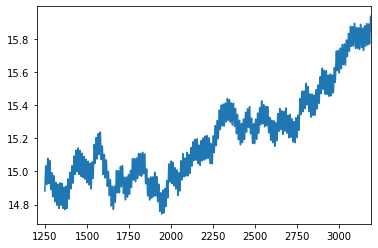

In [151]:
# Visualizing the land temperature trend
Gtemps['LandAndOceanAverageTemperature'].rolling(50).mean().plot()

In [152]:
temp_anom = Gtemps[['dt', 'LandAndOceanAverageTemperature']]
temp_anom.loc[:,'dt'] = pd.to_datetime(temp_anom.loc[:,'dt'])
temp_anom.rename(columns = {'dt':'Year', 'LandAndOceanAverageTemperature': 'AnnualAvegTemp'}, inplace=True)
temp_anom.set_index('Year', inplace = True)
temp_anom.sort_index(axis=0, inplace=True)

In [153]:
temp_anom.head()

,AnnualAvegTemp
Year,
1850-01-01,12.833
1850-02-01,13.588
1850-03-01,14.043
1850-04-01,14.667
1850-05-01,15.507


In [154]:
temp_anom = temp_anom.resample('A').mean()

In [155]:
temp_anom.index = temp_anom.index.year

In [156]:
temp_anom.head()

,AnnualAvegTemp
Year,
1850,14.867167
1851,14.991833
1852,15.006500
1853,14.955167
1854,14.991000


The most important feature is not the temperature itself, but how it has changed over the years in comparison to its average value.

In [157]:
aveg_temp = temp_anom.loc['1951':'1980'].mean()['AnnualAvegTemp']
temp_anom['Temperature Anomaly'] = temp_anom['AnnualAvegTemp'] - aveg_temp
temp_anom.head()

,AnnualAvegTemp,Temperature Anomaly
Year,,
1850,14.867167,-0.432381
1851,14.991833,-0.307714
1852,15.006500,-0.293047
1853,14.955167,-0.344381
1854,14.991000,-0.308547


In [158]:
temp_anom.tail()

,AnnualAvegTemp,Temperature Anomaly
Year,,
2011,15.769500,0.469953
2012,15.802333,0.502786
2013,15.854417,0.554869
2014,15.913000,0.613453
2015,16.058583,0.759036


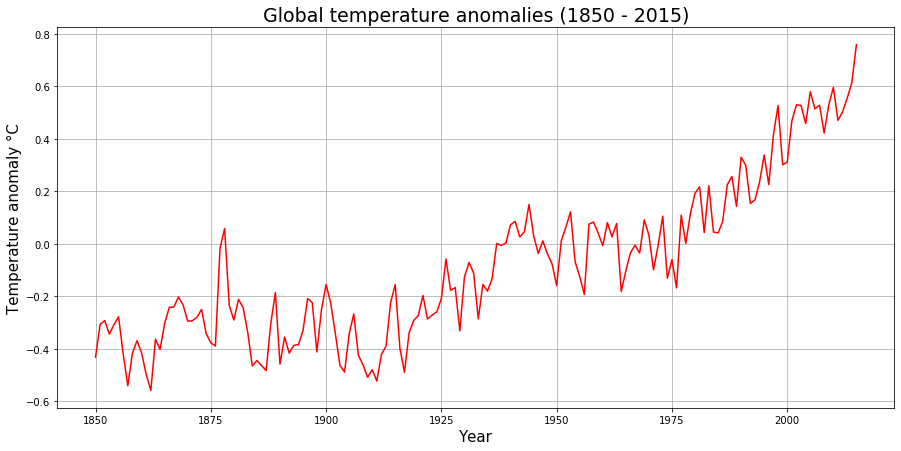

In [301]:
fig = plt.figure(figsize=(15, 7)); ax = fig.add_subplot(1,1,1)

ax.plot(temp_anom['Temperature Anomaly'], 'r')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature anomaly °C', fontsize=15)
plt.title('Global temperature anomalies (1850 - 2015)', fontsize=19)

plt.grid()
plt.savefig('tempAnom.svg')
plt.show()

Analysing the temperature changes in Brazil

In [180]:
BrTemp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [181]:
# Selecting rows where country is Brazil
BrTemp = BrTemp.loc[BrTemp['Country']=='Brazil',['dt','AverageTemperature']]

In [182]:
BrTemp.loc[:,'dt'] = pd.to_datetime(BrTemp.loc[:,'dt'])

In [183]:
BrTemp.rename(columns = {'dt':'Year'}, inplace=True)
BrTemp.set_index('Year', inplace = True)
BrTemp.sort_index(axis=0, inplace=True)

In [184]:
BrTemp = BrTemp.resample('A').mean()
BrTemp.index = BrTemp.index.year
BrTemp.head()

,AverageTemperature
Year,
1832,23.858583
1833,24.517833
1834,24.346750
1835,23.537500
1836,23.921167


In [193]:
BrTemp.dropna(inplace=True)

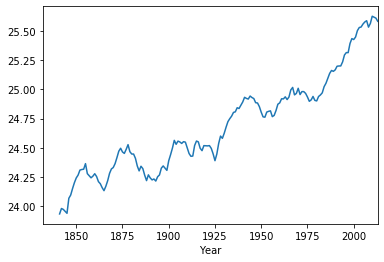

In [195]:
BrTemp['AverageTemperature'].rolling(10).mean().plot()

In [197]:
temp_anom_br = BrTemp.loc['1951':'1980'].mean()['AverageTemperature']
BrTemp['Temperature Anomaly'] = BrTemp['AverageTemperature'] - temp_anom_br
BrTemp.head()

,AverageTemperature,Temperature Anomaly
Year,,
1832,23.858583,-1.072247
1833,24.517833,-0.412997
1834,24.346750,-0.584081
1835,23.537500,-1.393331
1836,23.921167,-1.009664


In [212]:
X = [i for i in range(0, len(BrTemp))]
X = np.reshape(X, (len(X), 1))
y = BrTemp['Temperature Anomaly']
model = LinearRegression()
model.fit(X, y)
BrTemp['Trend'] = model.predict(X)

In [213]:
BrTemp.head()

,AverageTemperature,Temperature Anomaly,Trend
Year,,,
1832,23.858583,-1.072247,-0.954769
1833,24.517833,-0.412997,-0.946733
1834,24.346750,-0.584081,-0.938697
1835,23.537500,-1.393331,-0.930661
1836,23.921167,-1.009664,-0.922626


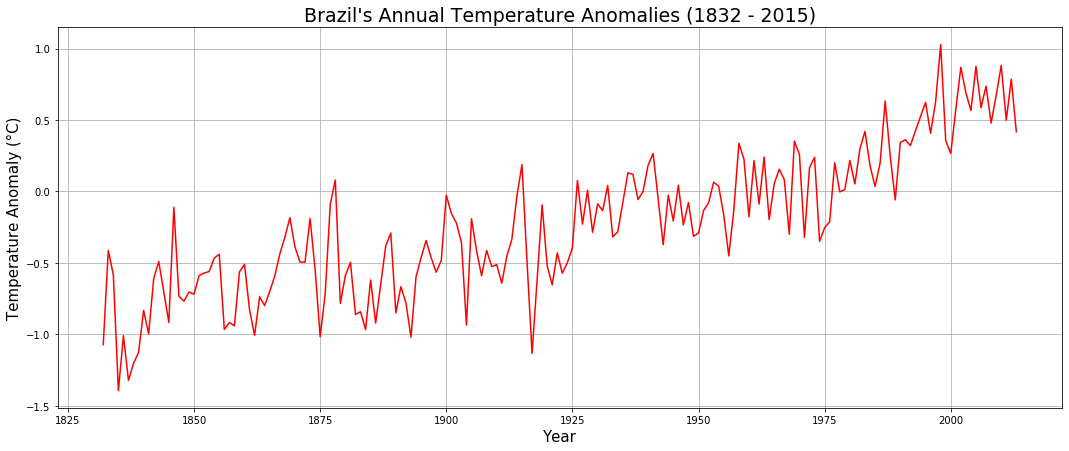

In [306]:
fig = plt.figure(figsize=(18,7)); ax = fig.add_subplot(1,1,1)

ax.plot(BrTemp['Temperature Anomaly'], 'r')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature Anomaly (°C)', fontsize=15)
plt.title('Brazil\'s Annual Temperature Anomalies (1832 - 2015)', fontsize=19)

#ax.plot(BrTemp['Trend'])
plt.savefig('BrTempAnom.svg')
plt.grid()
plt.show()

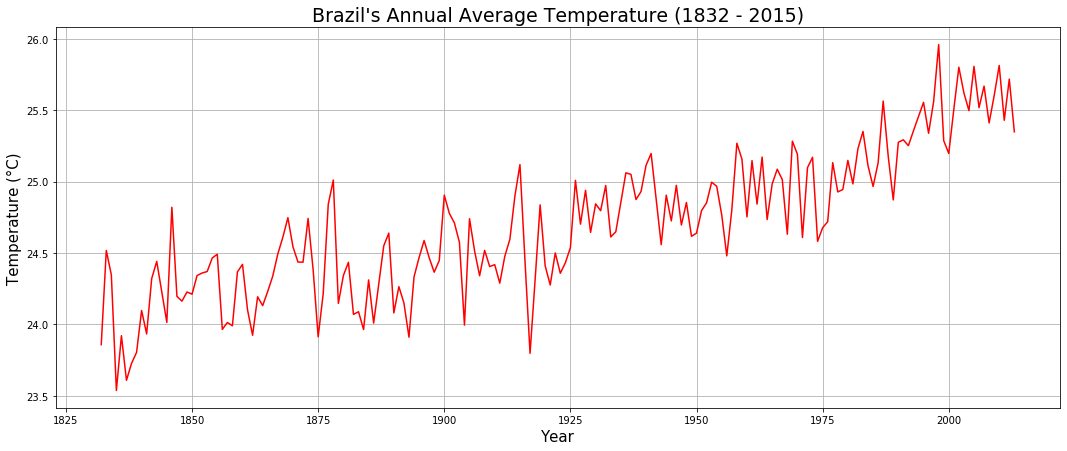

In [307]:
fig = plt.figure(figsize=(18,7)); ax = fig.add_subplot(1,1,1)

ax.plot(BrTemp['AverageTemperature'], 'r')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=15)
plt.title('Brazil\'s Annual Average Temperature (1832 - 2015)', fontsize=19)

plt.savefig('BrAvegTemp.svg')
plt.grid()
plt.show()

In [218]:
NDis = pd.read_csv('number-of-natural-disaster-events.csv')

In [221]:
NDis.tail()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
823,Wildfire,NaN,2014,4
824,Wildfire,NaN,2015,12
825,Wildfire,NaN,2016,10
826,Wildfire,NaN,2017,13
827,Wildfire,NaN,2018,10


In [226]:
NDis.rename(columns={'Number of reported natural disasters (reported disasters)':'Occurrences'}, inplace=True)

In [236]:
NDis.drop(['Code'], axis=1, inplace=True)

In [239]:
NatDis = NDis.pivot(index='Year', columns='Entity', values='Occurrences')

In [240]:
NatDis.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
# Removing disasters not related with temperature
NatDis.drop(['Impact', 'Earthquake', 'Mass movement (dry)', 'Volcanic activity'], axis=1, inplace=True)
NatDis.fillna(0, inplace=True)

In [252]:
NatDis.head()

Entity,All natural disasters,Drought,Extreme temperature,Extreme weather,Flood,Landslide,Wildfire
Year,,,,,,,
1900,5.0,2.0,0.0,1.0,1.0,0.0,0.0
1901,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,0.0,1.0,0.0,0.0,0.0
1903,8.0,1.0,0.0,2.0,2.0,0.0,0.0
1904,2.0,0.0,0.0,1.0,0.0,0.0,0.0


In [253]:
NatDis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 1900 to 2018
Data columns (total 7 columns):
All natural disasters    119 non-null float64
Drought                  119 non-null float64
Extreme temperature      119 non-null float64
Extreme weather          119 non-null float64
Flood                    119 non-null float64
Landslide                119 non-null float64
Wildfire                 119 non-null float64
dtypes: float64(7)
memory usage: 7.4 KB


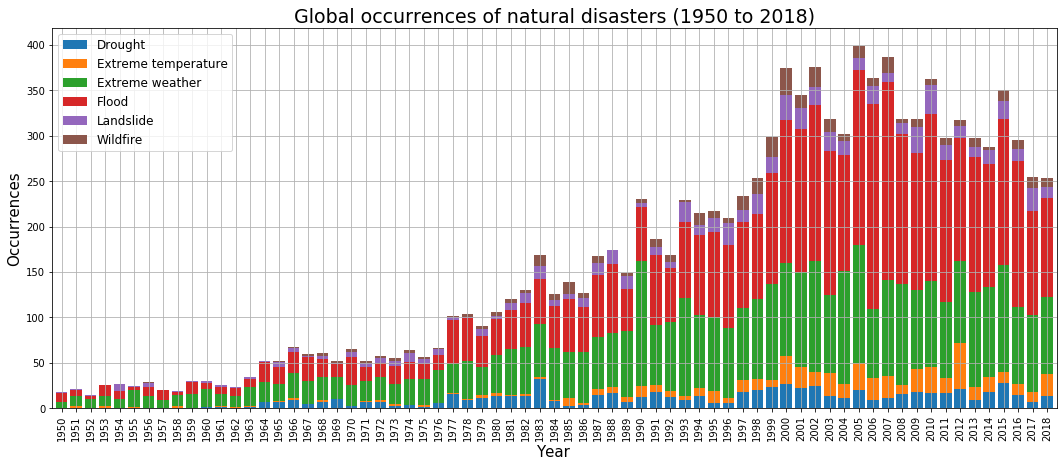

In [275]:
NatDis.drop('All natural disasters', axis=1).loc[1950:].plot.bar(width=0.8, stacked=True, figsize=(18, 7))

plt.title('Global occurrences of natural disasters (1950 to 2018)', fontsize=19)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Occurrences', fontsize=15)
plt.legend(loc=2, prop={'size':12})

plt.grid()
plt.savefig('Dis.svg')
plt.show()

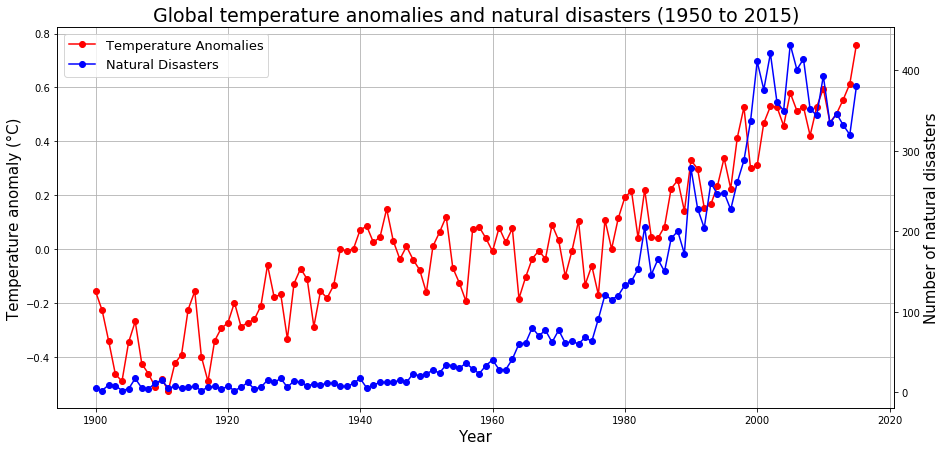

In [274]:
fig, ax = plt.subplots(figsize=(15, 7))
ax2 = ax.twinx()

line1 = ax.plot(temp_anom['Temperature Anomaly'].loc[1900:], '-ro', label = 'Temperature Anomalies')
line2 = ax2.plot(NatDis['All natural disasters'].loc[:2015], '-bo',label = 'Natural Disasters')

lines = line1 + line2
labels = [l.get_label() for l in lines]

ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Temperature anomaly (°C)', fontsize=15)
ax2.set_ylabel('Number of natural disasters', fontsize=15)
plt.title('Global temperature anomalies and natural disasters (1950 to 2015)', fontsize=19)
ax.legend(lines, labels, loc=0, prop={'size':13})

ax.grid()
plt.savefig('GTemp.svg')
plt.show()


In [277]:
combined = temp_anom.loc[1900:].drop('AnnualAvegTemp', axis=1).join(NatDis)
combined.head()

,Temperature Anomaly,All natural disasters,Drought,Extreme temperature,Extreme weather,Flood,Landslide,Wildfire
Year,,,,,,,,
1900,-0.155631,5.0,2.0,0.0,1.0,1.0,0.0,0.0
1901,-0.226214,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,-0.341214,9.0,0.0,0.0,1.0,0.0,0.0,0.0
1903,-0.462964,8.0,1.0,0.0,2.0,2.0,0.0,0.0
1904,-0.489131,2.0,0.0,0.0,1.0,0.0,0.0,0.0


In [300]:
combined.drop('All natural disasters', axis=1).corr()['Temperature Anomaly'].sort_values(ascending=False)

Temperature Anomaly    1.000000
Extreme weather        0.848536
Flood                  0.841740
Landslide              0.772180
Drought                0.750086
Extreme temperature    0.738191
Wildfire               0.683839
Name: Temperature Anomaly, dtype: float64

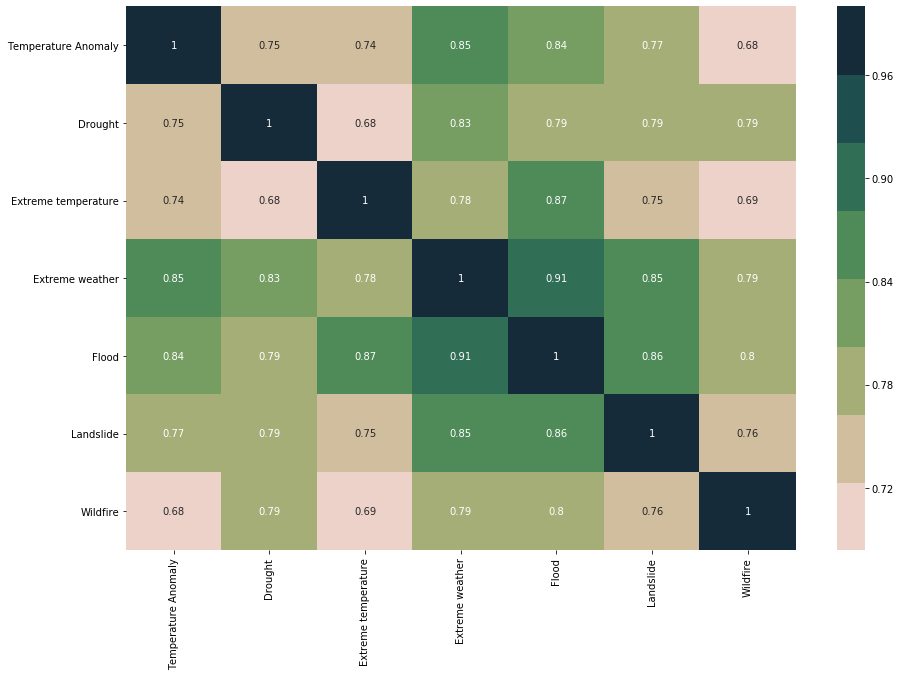

In [309]:
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(combined.drop('All natural disasters', axis=1).corr(), cmap=sns.cubehelix_palette(8, rot=-.75),
                annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('corr.svg')
plt.show()